# Udacity Data Science Nanodegree - Project 1
## For questions 1 and 2 the datasets of stackoverflow from 2014 and 2019 were used, while for the last question only the dataset from 2019 was used
##### Please note, since I do not use machine learning techniques in this notebook and use bins for the presentation of my results, an imputation of the NAs would falsify the results, so I decided against filling the NAs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pd.options.display.max_seq_items = None

df_2014 = pd.read_csv("/home/rakete/Dokumente/Jupyter_Skripte/SOF_2014.csv", header=[0,1])
df_2019 = pd.read_csv("/home/rakete/Dokumente/Jupyter_Skripte/SOF_2019.csv")
df_2019_schema = pd.read_csv("/home/rakete/Dokumente/Jupyter_Skripte/survey_results_schema.csv")

In [2]:
# Check shape of df_2014
df_2014.shape

(7643, 120)

In [3]:
# Check shape of df_2019
df_2019.shape

(88883, 85)

In [4]:
# Look at head and tail of df_2014
df_2014.iloc[(np.r_[0:2, -2:0])]

,What Country do you live in?,Unnamed: 1_level_0,Which US State or Territory do you live in?,How old are you?,What is your gender?,How many years of IT/Programming experience do you have?,Which of the following best describes your occupation?,"Including bonus, what is your annual compensation in USD?",How would you best describe the industry you currently work in?,How many developers are employed at your company?,...,Did you participate in the Apptivate contest?,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,How do you use Stack Overflow?,Unnamed: 114_level_0,Unnamed: 115_level_0,Unnamed: 116_level_0,Unnamed: 117_level_0,Unnamed: 118_level_0,How often do you find solutions to your programming problems on Stack Overflow without asking a new question?
,Response,Other (please specify),Response,Response,Response,Response,Response,Response,Response,Response,...,Response,Open-Ended Response,Response,Read other people's questions to solve my problems,Ask questions to solve problems,Answer questions I know the answer to,Looking for a job,Build my online reputation,Other (please specify),Response
0,India,NaN,NaN,30-34,Female,6/10/2014,Back-End Web Developer,"$20,000 - $40,000",Finance / Banking,100,...,No,NaN,500,Read other people's questions to solve my prob...,Ask questions to solve problems,NaN,NaN,NaN,NaN,Almost Always
1,Thailand,NaN,NaN,20-24,Male,<2,Back-End Web Developer,Student / Unemployed,Healthcare,NaN,...,NaN,NaN,Don't have an account,Read other people's questions to solve my prob...,NaN,NaN,NaN,NaN,NaN,NaN
7641,United States,NaN,Washington,25-29,Male,6/10/2014,Desktop Software Developer,"$120,000 - $140,000",Software Products,100,...,No,NaN,5000,Read other people's questions to solve my prob...,NaN,Answer questions I know the answer to,NaN,NaN,NaN,Almost Always
7642,United States,NaN,South Carolina,< 20,Male,<2,Student,Student / Unemployed,Not Currently Employed,1/5/2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Look at head and tail of df_2019
df_2019.iloc[(np.r_[0:2, -2:0])]

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88882,88863,NaN,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, and not looking for work",Spain,"Yes, full-time","Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers;Indu...,18.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;White or of European...,No,Appropriate in length,Easy


# Question 1  
### Which programming languages have become more popular within the last 5 years?

In [6]:
print("In 2014, {} of the {} survey participants named at least least one programming language ({:.2f}%).".format(sum(df_2014.iloc[:,42:53].isna().sum(axis = 1) != 11), len(df_2014), sum(df_2014.iloc[:,42:53].isna().sum(axis = 1) != 11)/len(df_2014)*100))
print("In 2019, {} of the {} survey participants named at least least one programming language ({:.2f}%).".format(df_2019["LanguageWorkedWith"].notna().sum(), len(df_2019), (df_2019["LanguageWorkedWith"].notna().sum()/len(df_2019))*100))

In 2014, 6440 of the 7643 survey participants named at least least one programming language (84.26%).
In 2019, 87569 of the 88883 survey participants named at least least one programming language (98.52%).


In [7]:
# Create a dict of the 11 most popular programming languages in 2014
pop_progL_2014 = {}
progL = ["C", "C++", "C#", "Java", "JavaScript","Node.js", "Objective-C", "PHP", "Python", "Ruby", "SQL"]
for k,v in zip(progL, df_2014.iloc[:,42:53].notna().sum().values):
    # nur 6640 der 7643 der Umfrageteilnehmer haben mindestens eine Sprache angegeben
    pop_progL_2014[k] = v/6440

In [8]:
# A look at the popularity of the programming languages in 2019
pop_progL_2014

{'C': 0.18229813664596273,
 'C++': 0.2201863354037267,
 'C#': 0.3692546583850932,
 'Java': 0.38493788819875774,
 'JavaScript': 0.5874223602484472,
 'Node.js': 0.09953416149068323,
 'Objective-C': 0.1048136645962733,
 'PHP': 0.265527950310559,
 'Python': 0.22872670807453416,
 'Ruby': 0.09208074534161491,
 'SQL': 0.5383540372670808}

In [9]:
pop_progL_2019 = {}

for val_full in df_2019["LanguageWorkedWith"].values:
    if not pd.isna(val_full):
        for val in val_full.split(";"):
            if val in progL:
                if val in pop_progL_2019.keys():
                    pop_progL_2019[val] += 1
                else:
                    pop_progL_2019[val] = 1

 
# nur 87569 der 88883 der Umfrageteilnehmer haben mindestens eine Sprache angegeben
pop_progL_2019 = {k:v/87569 for k,v in pop_progL_2019.items()}

In [10]:
# A look at the popularity of the programming languages in 2019 
pop_progL_2019

{'Java': 0.4101565622537656,
 'JavaScript': 0.6762552958238646,
 'Python': 0.41616325411960853,
 'C++': 0.2343751784307232,
 'C': 0.20574632575454785,
 'C#': 0.3094359876211901,
 'SQL': 0.5429318594479782,
 'Ruby': 0.08371684043440031,
 'PHP': 0.2629926115406137,
 'Objective-C': 0.04785940229990065}

In [11]:
# Create a pandas style dataframe
progL_2014_2019 = pd.DataFrame.from_records([{k:pop_progL_2014[k] for k,v in pop_progL_2019.items()}.values(), pop_progL_2019.values()], columns = pop_progL_2019.keys(), index = [2014, 2019]).T
progL_2014_2019["Difference"] = np.fromiter(pop_progL_2019.values(), dtype=float) - np.fromiter({k:pop_progL_2014[k] for k,v in pop_progL_2019.items()}.values(), dtype=float)
progL_2014_2019 = progL_2014_2019.sort_values("Difference", ascending=False)
progL_2014_2019.style.bar(subset=['Difference'], align='mid', color=['#d65f5f', '#5fba7d'])

,2014,2019,Difference
Python,0.228727,0.416163,0.187437
JavaScript,0.587422,0.676255,0.088833
Java,0.384938,0.410157,0.025219
C,0.182298,0.205746,0.023448
C++,0.220186,0.234375,0.014189
SQL,0.538354,0.542932,0.004578
PHP,0.265528,0.262993,-0.002535
Ruby,0.092081,0.083717,-0.008364
Objective-C,0.104814,0.047859,-0.056954
C#,0.369255,0.309436,-0.059819


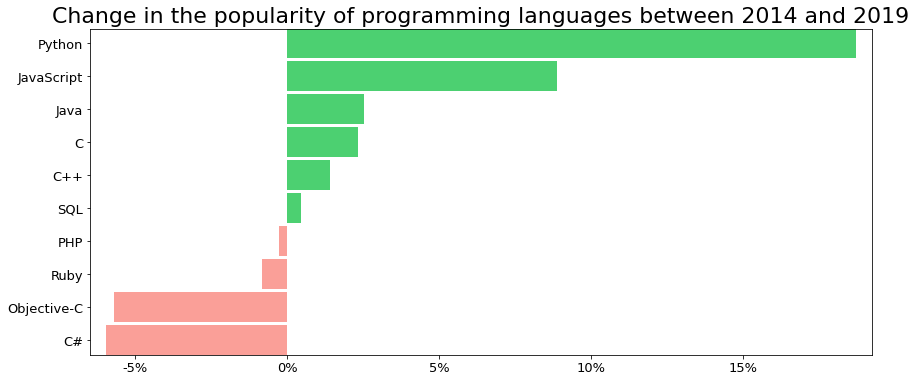

In [12]:
plt.figure(figsize=(14,6))
plt.hlines(y=progL_2014_2019.index[::-1], xmin=0, xmax= progL_2014_2019["Difference"][::-1], color=["#00bc35" if x > 0 else "#f8766d" for x in progL_2014_2019["Difference"]][::-1],  alpha=0.7, linewidth=30)
plt.xticks([-0.05, 0, 0.05, 0.1, 0.15], ['-5%', '0%', '5%', '10%', '15%'], fontsize=13)
plt.yticks(fontsize=13)
plt.title('Change in the popularity of programming languages between 2014 and 2019', fontdict={'size':22})
plt.xlim(min(progL_2014_2019["Difference"])-0.005, max(progL_2014_2019["Difference"])+0.005)
#plt.savefig('progL.png', bbox_inches='tight')
plt.show()

# Question 2
### Do experienced developers tend to work from home and how has this changed over the last 5 years?

In [13]:
print("In 2014, {} of the {} survey participants named at least least one programming language ({:.2f}%).".format(len(df_2014["Do you work remotely?"]["Response"].dropna()), len(df_2014), (len(df_2014["Do you work remotely?"]["Response"].dropna())/len(df_2014))*100))
print("In 2019, {} of the {} survey participants named at least least one programming language ({:.2f}%).".format(len(df_2019.iloc[:,35].dropna()), len(df_2019), (len(df_2019.iloc[:,35].dropna())/len(df_2019))*100))

In 2014, 7219 of the 7643 survey participants named at least least one programming language (94.45%).
In 2019, 70284 of the 88883 survey participants named at least least one programming language (79.07%).


In [14]:
# Possible remote reply options in df_2014
df_2014["Do you work remotely?"]["Response"].value_counts()

Occasionally        3132
Never               2606
Full-time Remote     762
Part-time Remote     719
Name: Response, dtype: int64

In [15]:
# Possible remote reply options in df_2019
df_2019.iloc[:,35].value_counts()

Less than once per month / Never                           30220
A few days each month                                      17242
All or almost all the time (I'm full-time remote)           8465
Less than half the time, but at least one day each week     6320
It's complicated                                            3675
More than half, but not all, the time                       2376
About half the time                                         1986
Name: WorkRemote, dtype: int64

In [16]:
def map_remote(col_val):
    
    """
    Maps the reply options from 2019 to 2014

    Parameters
    ----------
    col_val : str
        The remote column value of df_2019

    Returns
    -------
    str
        A mapped string
    """
     
    if col_val == "Less than once per month / Never":
        return "Never"
    
    elif col_val in ["A few days each month", "Less than half the time, but at least one day each week", "It's complicated"]:
        return "Occasionally"
    
    elif col_val in ["More than half, but not all, the time", "About half the time"]:
        return "Part-time Remote"
    
    elif col_val == "All or almost all the time (I'm full-time remote)":
        return "Full-time Remote"
    
    else:
        return np.nan

In [17]:
# Apply map_remote()
df_2019["Remote_Grouped"] = df_2019.iloc[:,35].apply(map_remote)
df_2014["Remote_Grouped"] = df_2014["Do you work remotely?"]["Response"]
# Check if the sum of the NAs is still the same
df_2019["Remote_Grouped"].notna().sum() == df_2019.iloc[:,35].notna().sum()

True

In [18]:
def split_age(col_val):    
   
    """
    Calculates the mean from the age range of df_2014

    Parameters
    ----------
    col_val : str
        Age range

    Returns
    -------
    int
        The mean of the age range
    """
    
    if pd.isna(col_val):
        return np.nan
    elif "-" in col_val:
        return np.mean([int(col_val.split("-")[0]), int(col_val.split("-")[1])])
    elif "<" in col_val:
        return int(col_val.strip()[-2:])-1
    else:
        return int(col_val.strip()[-2:])+1

In [19]:
# Apply split_age() on df_2014
df_2014["Mean_Age"] = df_2014["How old are you?"]["Response"].apply(split_age)
# Check if numbers of NAs is still the same (which should be the case)
any(df_2014["Mean_Age"].isna() == df_2014["How old are you?"]["Response"].isna())

True

In [20]:
def group_age(col_val):
        
    """
    Maps an age value into an age range

    Parameters
    ----------
    col_val : int
        A persons' age

    Returns
    -------
    str
        An age range 
    """
    
    if pd.isna(col_val):
        return np.nan
    elif col_val < 20:
        return "<20"
    elif col_val >= 20 and col_val < 30:
        return "20-29"
    elif col_val >= 30 and col_val < 40:
        return "30-39"
    elif col_val >= 40 and col_val < 49:
        return "40-49"
    elif col_val >= 50 and col_val < 59:
        return "50-59"
    else:
        return ">=60"

In [21]:
# Create new columns
df_2014["Age_Grouped"] = df_2014["Mean_Age"].apply(group_age)
df_2019["Age_Grouped"] = df_2019["Age"].apply(group_age)

In [22]:
# Create subset for the graph
quest2_df_2014 = df_2014.loc[:,["Age_Grouped", "Remote_Grouped"]].dropna()
quest2_df_2019 = df_2019.loc[:,["Age_Grouped", "Remote_Grouped"]].dropna()

In [23]:
# Look at the age groups in df_2014 grouped by remote type
quest2_df_2014.groupby(["Age_Grouped", "Remote_Grouped"])["Age_Grouped"].count()

Age_Grouped  Remote_Grouped  
20-29        Full-time Remote     334
             Never               1535
             Occasionally        1631
             Part-time Remote     326
30-39        Full-time Remote     231
             Never                571
             Occasionally         957
             Part-time Remote     183
40-49        Full-time Remote      81
             Never                156
             Occasionally         309
             Part-time Remote      90
50-59        Full-time Remote      23
             Never                 35
             Occasionally          75
             Part-time Remote      31
<20          Full-time Remote      87
             Never                301
             Occasionally         150
             Part-time Remote      84
>=60         Full-time Remote       6
             Never                  8
             Occasionally          10
             Part-time Remote       5
Name: Age_Grouped, dtype: int64

In [24]:
# Look at the age groups in df_2019 grouped by remote type 
quest2_df_2019.groupby("Remote_Grouped")["Age_Grouped"].value_counts()

Remote_Grouped    Age_Grouped
Full-time Remote  30-39           3213
                  20-29           2534
                  40-49           1203
                  50-59            449
                  >=60             236
                  <20              137
Never             20-29          15402
                  30-39           8948
                  40-49           2171
                  50-59            624
                  <20              355
                  >=60             330
Occasionally      20-29          11503
                  30-39           9353
                  40-49           2636
                  50-59            828
                  >=60             352
                  <20              226
Part-time Remote  20-29           1604
                  30-39           1391
                  40-49            506
                  50-59            199
                  >=60             111
                  <20               55
Name: Age_Grouped, dtype: int64

In [25]:
def create_barchart_arrays(df): 
    
    """
    Creates numpy arrays for the  following plot

    Parameters
    ----------
    df : DataFrame
        A Pandas DataFrame

    Returns
    -------
    numpy array
        A two-dimensional numpy array 
    """

    stacked_bar_list = [[],[],[],[]]
    for i, rem in enumerate(["Never", "Occasionally", "Part-time Remote", "Full-time Remote"]):
        for age_group in ["<20", "20-29", "30-39", "40-49", "50-59", ">=60"]:
            stacked_bar_list[i].append(df.groupby(["Age_Grouped", "Remote_Grouped"])["Age_Grouped"].count()[age_group][rem]/df.groupby(["Age_Grouped"])["Age_Grouped"].count()[age_group])
    return np.array(stacked_bar_list)

In [26]:
# Apply create_barchart_lists()
quest2_barchart_array_2014 = create_barchart_arrays(quest2_df_2014)
quest2_barchart_array_2019 = create_barchart_arrays(quest2_df_2019)

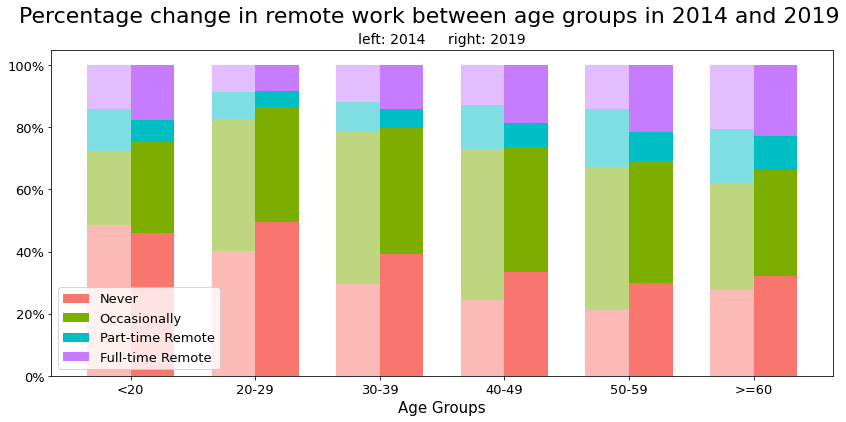

In [27]:
fig, ax = plt.subplots(figsize=(14, 6))
barWidth = 0.85
width = 0.35
x_age = ["<20", "20-29", "30-39", "40-49", "50-59", ">=60"]
alpha = 0.5

ax.bar(np.arange(6) - width/2, quest2_barchart_array_2014[0], width, alpha = alpha, color = "#f8766d")
ax.bar(np.arange(6) + width/2, quest2_barchart_array_2019[0], width, color = "#f8766d", label='Never')
ax.bar(np.arange(6) - width/2, quest2_barchart_array_2014[1], bottom = quest2_barchart_array_2014[0], width = width, alpha = alpha, color = "#7cae00")
ax.bar(np.arange(6) + width/2, quest2_barchart_array_2019[1], bottom = quest2_barchart_array_2019[0], width = width, color = "#7cae00", label="Occasionally")
ax.bar(np.arange(6) - width/2, quest2_barchart_array_2014[2], bottom = quest2_barchart_array_2014[0]+quest2_barchart_array_2014[1], width = width, alpha = alpha, color = "#00bfc4")
ax.bar(np.arange(6) + width/2, quest2_barchart_array_2019[2], bottom = quest2_barchart_array_2019[0]+quest2_barchart_array_2019[1], width = width, color = "#00bfc4", label="Part-time Remote")
ax.bar(np.arange(6) - width/2, quest2_barchart_array_2014[3], bottom = quest2_barchart_array_2014[0]+quest2_barchart_array_2014[1]+quest2_barchart_array_2014[2], width = width, alpha = alpha, color = "#c77cff")
ax.bar(np.arange(6) + width/2, quest2_barchart_array_2019[3], bottom = quest2_barchart_array_2019[0]+quest2_barchart_array_2019[1]+quest2_barchart_array_2019[2], width = width, color = "#c77cff", label="Full-time Remote")

plt.xticks(np.arange(6), ["<20", "20-29", "30-39", "40-49", "50-59", ">=60"], fontsize=13)
plt.suptitle('Percentage change in remote work between age groups in 2014 and 2019', size=22)
plt.title("left: 2014     right: 2019", size = 14)
plt.xlabel("Age Groups", fontsize=15)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=13)
ax.legend(fontsize = 13)
#plt.savefig('remote.png', bbox_inches='tight')
plt.show()

# Question 3
### Is Stackoverflow less used in European countries where the percentage of English language skills is lower? 

In [28]:
print("In 2019, {} of the {} survey participants named their county of origin ({:.2f}%).".format(len(df_2019["Country"].dropna()), len(df_2019), len(df_2019["Country"].dropna())/len(df_2019)*100))

In 2019, 88751 of the 88883 survey participants named their county of origin (99.85%).


In [29]:
# Show top 20 countries of participants
df_2019["Country"].value_counts()[:20]

United States         20949
India                  9061
Germany                5866
United Kingdom         5737
Canada                 3395
France                 2391
Brazil                 1948
Poland                 1922
Australia              1903
Netherlands            1852
Russian Federation     1694
Spain                  1604
Italy                  1576
Sweden                 1274
Switzerland             978
Israel                  952
Turkey                  949
Pakistan                923
Ukraine                 868
Austria                 839
Name: Country, dtype: int64

In [31]:
# Top 10 European non-English speaking countries 
top10_countries = ["Sweden", "Switzerland", "Netherlands", "Austria", "Germany", "Poland", "France", "Spain", "Italy", "Ukraine"]
# Number of inhabitants of these countries
top10_countries_inhab = [10230000, 8570000, 17280000, 8850000, 83020000, 37970000, 66990000, 46940000, 60360000, 41980000]

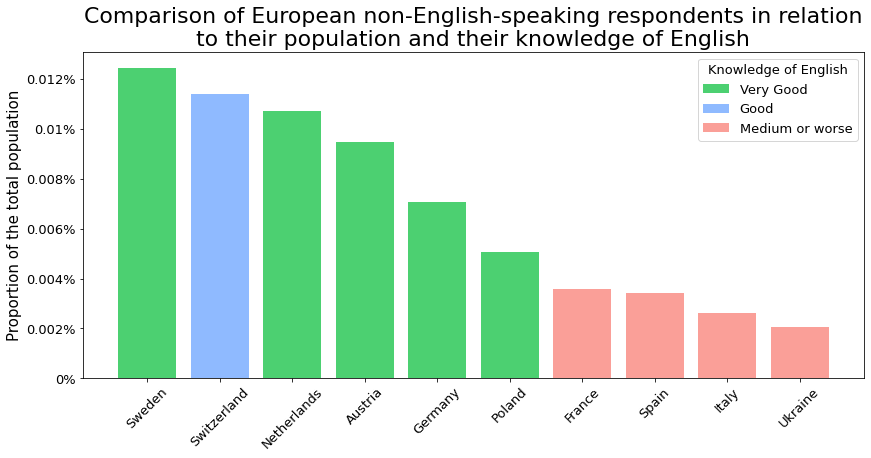

In [35]:
#https://www.ef.com/epi/
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(top10_countries, [df_2019["Country"].value_counts()[:20][c]/i*100 for (c,i) in zip(top10_countries, top10_countries_inhab)], alpha = 0.7, color = ["#00bc35", "#609dff", "#00bc35", "#00bc35", "#00bc35", "#00bc35", "#f8766d", "#f8766d", "#f8766d", "#f8766d"])
ax.bar(top10_countries, np.zeros(10), alpha = 0.7, label = "Very Good", color = "#00bc35")
ax.bar(top10_countries, np.zeros(10), alpha = 0.7, label = "Good", color = "#609dff")
ax.bar(top10_countries, np.zeros(10), alpha = 0.7, label = "Medium or worse", color = "#f8766d")
plt.yticks([0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012], ['0%', '0.002%', '0.004%', '0.006%', '0.008%', '0.01%', '0.012%'], fontsize=13)
plt.xticks(fontsize=13, rotation = 45)
plt.ylabel("Proportion of the total population", size = 15)
#plt.suptitle('Comparison of European non-English-speaking respondents in relation\nto their population and their knowledge of English', size=22, y=1.08)
plt.title('Comparison of European non-English-speaking respondents in relation\nto their population and their knowledge of English', size=22)
plt.legend(loc = 1, title = "Knowledge of English",title_fontsize=13,fontsize = 13)
#plt.savefig('english_europe.png', bbox_inches='tight')
plt.show()